# [Sutton and Barto Notebooks](https://github.com/seungjaeryanlee/sutton-barto-notebooks): Example 13.1

[ModuAI](https://www.modu.ai)  
Author: Seung Jae (Ryan) Lee  

![](example_13_1.png)

In [1]:
from enum import IntEnum

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Action(IntEnum):
    """
    All possible actions in the small corridor gridworld environment.
    """
    LEFT = -1
    RIGHT = 1

## Environment

In [3]:
class Environment:
    """
    The small corridor gridworld environment specified in Example 13.1. The
    current state is not observable in this environment, and in the second
    state the LEFT action moves the agent right and the RIGHT action moves
    the agent left.
    """
    action_space = list(Action)
    state_space = [0, 1, 2, 3]

    def __init__(self):
        self.state = 0

    def step(self, action):
        assert action in self.action_space

        if self.state == 0 and action == Action.RIGHT:
            self.state += action
        elif self.state == 1:
            self.state -= action
        elif self.state == 2:
            self.state += action

        return {}, -1, self.is_done(), {}

    def reset(self):
        self.state = 0

    def is_done(self):
        return self.state == 3

## Agent

In [4]:
class StochasticAgent:
    """
    A stochastic agent that chooses the action RIGHT with given probability.
    """

    def __init__(self, probability_right):
        self.p_right = probability_right

    def get_action(self):
        if np.random.random() < self.p_right:
            return Action.RIGHT
        else:
            return Action.LEFT

## Plot

In [5]:
def plot(epsilon=0.1, xs=np.arange(0.01, 1, 0.01).tolist(), n_episodes=1000):
    """
    Draws figure in Example 13.1.
    """
    # Add epsilon-greedy left and right to xs
    x_epsilon_left = epsilon / 2
    x_epsilon_right = 1 - epsilon / 2
    xs.extend([x_epsilon_left, x_epsilon_right])
    xs.sort()
    i_epsilon_left = xs.index(x_epsilon_left)
    i_epsilon_right = xs.index(x_epsilon_right)

    average_rewards = []
    for p_right in xs:
        env = Environment()
        agent = StochasticAgent(p_right)

        total_reward = 0
        for _ in range(n_episodes):
            env.reset()
            total_episode_reward = 0
            done = False
            while not done:
                action = agent.get_action()
                _, reward, done, _ = env.step(action)
                total_episode_reward += reward

            total_reward += total_episode_reward

        average_rewards.append(total_reward / n_episodes)

    max_pt = (xs[np.argmax(average_rewards)], np.max(average_rewards))
    epsilon_left_pt = (xs[i_epsilon_left], average_rewards[i_epsilon_left])
    epsilon_right_pt = (xs[i_epsilon_right], average_rewards[i_epsilon_right])

    print('Optimal Policy Probability: {:.2f}'.format(max_pt[0]))
    print('Optimal Policy Reward     : {:.2f}'.format(max_pt[1]))
    print('Epsilon Left Reward       : {:.2f}'.format(epsilon_left_pt[1]))
    print('Epsilon Right Reward      : {:.2f}'.format(epsilon_right_pt[1]))

    plt.plot(xs, average_rewards)
    plt.annotate('optimal\nstochastic\npolicy',
                 max_pt,
                 xytext=(max_pt[0], max_pt[1] - 20),
                 arrowprops=dict(arrowstyle='->'),
                 horizontalalignment='center')
    plt.annotate('$\\epsilon$-greedy left',
                 epsilon_left_pt,
                 xytext=(epsilon_left_pt[0] + 0.05, epsilon_left_pt[1]),
                 arrowprops=dict(arrowstyle='->'),
                 horizontalalignment='left')
    plt.annotate('$\\epsilon$-greedy right',
                 epsilon_right_pt,
                 xytext=(epsilon_right_pt[0] - 0.05, epsilon_right_pt[1]),
                 arrowprops=dict(arrowstyle='->'),
                 horizontalalignment='right')
    plt.xlim(0, 1)
    plt.ylim(-100, -10)
#     plt.savefig('plot.png')
    plt.show()

Optimal Policy Probability: 0.56
Optimal Policy Reward     : -11.37
Epsilon Left Reward       : -82.92
Epsilon Right Reward      : -44.16


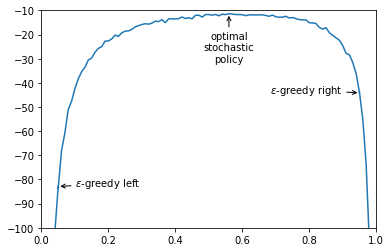

In [6]:
plot()